# Transfer Learning

Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

There are perhaps a dozen or more top-performing models for image recognition that can be downloaded and used as the basis for image recognition and related computer vision tasks.

Perhaps three of the more popular models are as follows:

1. VGG (e.g. VGG16 or VGG19).
2. GoogLeNet (e.g. InceptionV3).
3. Residual Network (e.g. ResNet50).
4. Mobile Net

[Read more about available models in Keras](https://keras.io/api/applications/)

<figure>
    <center> <img src="./img/7.PNG"><center/>
</figure>
<figure>
    <center> <img src="./img/6.PNG"><center/>
</figure>

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import MobileNetV2  # Import The MobileNet NN Architecture
from keras.layers import AveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model

## Import Preprocessed Data Arrays

In [2]:
data = np.load("data-mobile-net.npy")
target = np.load("target-mobile-net.npy")

## CNN Architecture

In [3]:
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3))) 

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)    
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

#create the model
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    
    layer.trainable = False   
    
# compile
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\2498316943.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,338 (9.27 MB)

 Trainable params: 172,354 (673.26 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

<figure>
    <center> <img src="./img/8.PNG"><center/>
</figure>

## Split Train Test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

## Train The CNN

In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 439ms/step - accuracy: 0.7780 - loss: 0.5285 - val_accuracy: 0.9900 - val_loss: 0.0734
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 379ms/step - accuracy: 0.9591 - loss: 0.1242 - val_accuracy: 0.9850 - val_loss: 0.0741
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 358ms/step - accuracy: 0.9620 - loss: 0.1209 - val_accuracy: 0.9800 - val_loss: 0.0709
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 362ms/step - accuracy: 0.9704 - loss: 0.0751 - val_accuracy: 0.9800 - val_loss: 0.0882
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 355ms/step - accuracy: 0.9790 - loss: 0.0579 - val_accuracy: 0.9900 - val_loss: 0.0896
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 356ms/step - accuracy: 0.9922 - loss: 0.0270 - val_accuracy: 0.9800 - val_loss: 0.0989
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 364ms/step - accuracy: 0.9822 - loss: 0.0498 - val_accuracy: 0.9800 - val_loss: 0.0919
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accu

## Visualizing The Loss And The Accuracy of Trained CNN

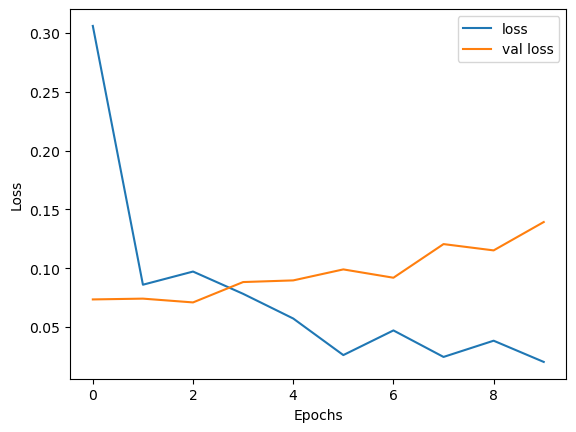

In [6]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

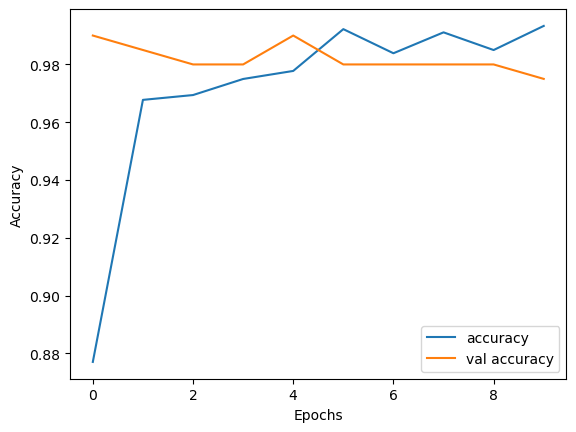

In [7]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## Evaluating The CNN Using Testing Data

In [8]:
loss_accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss_accuracy[0]} \nAccuracy: {loss_accuracy[1]}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.9790 - loss: 0.2267
Loss: 0.13925200700759888 
Accuracy: 0.9750000238418579
